In [1]:
import sys
sys.path.append("../")
sys.path.append("../lib/")

sys.path

['/tmp/60601b74-5735-45f1-b41d-f28b4a79b1ea',
 '/home/thales/.vscode/extensions/ms-python.python-2020.2.64397/pythonFiles',
 '/home/thales/.vscode/extensions/ms-python.python-2020.2.64397/pythonFiles/lib/python',
 '/home/thales/anaconda3/lib/python37.zip',
 '/home/thales/anaconda3/lib/python3.7',
 '/home/thales/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/home/thales/.local/lib/python3.7/site-packages',
 '/home/thales/anaconda3/lib/python3.7/site-packages',
 '/home/thales/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/home/thales/.ipython',
 '../',
 '../lib/']

In [2]:
import src.enviroment as enviroment
import src.pacman_problem as pacman
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

#from ghost_avoidance_heuristic import GhostAvoidanceHeuristic
# Needed to hide warnings in the matplotlib sections
import warnings
import numpy as np
import time
warnings.filterwarnings("ignore")

In [3]:
maze_arqs = {'Mazes/TinyMaze01.txt':[30,28],
             'Mazes/SmallMaze01.txt':[30,84],
             'Mazes/SmallMaze02.txt':[30,56],
             'Mazes/MediumMaze01.txt':[60,56],
             'Mazes/MediumMaze02.txt':[60,112],
             'Mazes/BigMaze01.txt':[60,140],
             'Mazes/BigMaze02.txt':[90,140],
             'maze-test.txt':[28,28]}

In [4]:
maze_name = 'Mazes/BigMaze02.txt'
maze, initial_position, goal_position = enviroment.getMazeTest(maze_name, maze_arqs[maze_name][0], maze_arqs[maze_name][1])
print("Initial position: " + str(initial_position))
print("Goal position: " + str(goal_position))

Initial position: (-1, -1)
Goal position: (-1, -1)


In [5]:
tam_plot = 30
mazeName_plot = maze_name[6:maze_name.index('.')]

In [6]:
if maze_name == 'Mazes/BigMaze02.txt':
    initial_position = (1, 15)
    goal_position = (59, 125)

In [7]:
def get_solution_info(node, expanded_nodes, food_nodes):
    print("Number of expanded nodes:")
    print(expanded_nodes)
    print("Number of expanded food nodes:")
    print(food_nodes)
    food_nodes_path = 0
    for n in node.path():
        food_nodes_path += problem.check_food(n.state)
    print("Number of nodes in the path:")
    print(len(node.path()))
    print("Number of food nodes in the path:")
    print(food_nodes_path)
    
    print("------------------------------------------------")
    
    print(node.solution())
    print("Path:")
    print(node.path())

In [8]:
def make_grid_plot(maze, initial_position, goal_position, maze_name):
    grid, food_x, food_y = maze.get_int_grid(initial_position, goal_position)

    fig, ax = plt.subplots(figsize=(tam_plot, tam_plot))
    cmap = colors.ListedColormap(['yellow', 'red', 'darkblue','gray','black'])

    im = ax.imshow(grid, cmap=cmap)
    ax = plt.gca()

    ax.set_xticks(np.arange(len(grid[0])))
    ax.set_yticks(np.arange(len(grid)))
    ax.set_xticklabels(np.arange(0, len(grid[0]), 1))
    ax.set_yticklabels(np.arange(0, len(grid), 1))

    ax.set_xticks(np.arange(-.5, len(grid[0])-1, 1), minor=True);
    ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    ax.scatter(food_y, food_x, color = 'white', zorder=10)

    plt.savefig("Figure/"+maze_name+str(initial_position)+str(goal_position)+'.png', dpi=300, bbox_inches='tight')
    plt.show()

In [9]:
def make_shockwave_grid_plot(maze, initial_position, goal_position, mazeName_plot):
    grid, food_x, food_y = maze.get_int_grid(initial_position, goal_position)

    fig, ax = plt.subplots(figsize=(tam_plot, tam_plot))
    cmap = 'hot'

    im = ax.imshow(maze.shockwave_grid, cmap=cmap)
    ax = plt.gca()

    ax.set_xticks(np.arange(len(grid[0])))
    ax.set_yticks(np.arange(len(grid)))
    ax.set_xticklabels(np.arange(0, len(grid[0]), 1))
    ax.set_yticklabels(np.arange(0, len(grid), 1))

    ax.set_xticks(np.arange(-.5, len(grid[0])-1, 1), minor=True);
    ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    plt.savefig("Figure/"+mazeName_plot+str(initial_position)+str(goal_position)+ 'SW.png', dpi=300, bbox_inches='tight')
    plt.show()

In [10]:
def make_path_plot(maze, initial_position, goal_position, node, maze_name, alg):    
    fig, ax = plt.subplots(figsize=(tam_plot, tam_plot))
    cmap = colors.ListedColormap(['yellow', 'red', 'purple', 'black'])

    grid, food_x, food_y = maze.get_final_grid(initial_position, goal_position, [n.state for n in node.path()])

    im = ax.imshow(grid, cmap=cmap)
    ax = plt.gca()

    ax.set_xticks(np.arange(len(grid[0])))
    ax.set_yticks(np.arange(len(grid)))
    ax.set_xticklabels(np.arange(0, len(grid[0]), 1))
    ax.set_yticklabels(np.arange(0, len(grid), 1))

    ax.set_xticks(np.arange(-.5, len(grid[0])-1, 1), minor=True);
    ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    ax.scatter(food_y, food_x, color = 'white', zorder=10)
    
    plt.savefig("Figure/"+alg+"Path_"+maze_name+str(initial_position)+str(goal_position)+'.png', dpi=300, bbox_inches='tight')
    plt.show()
    

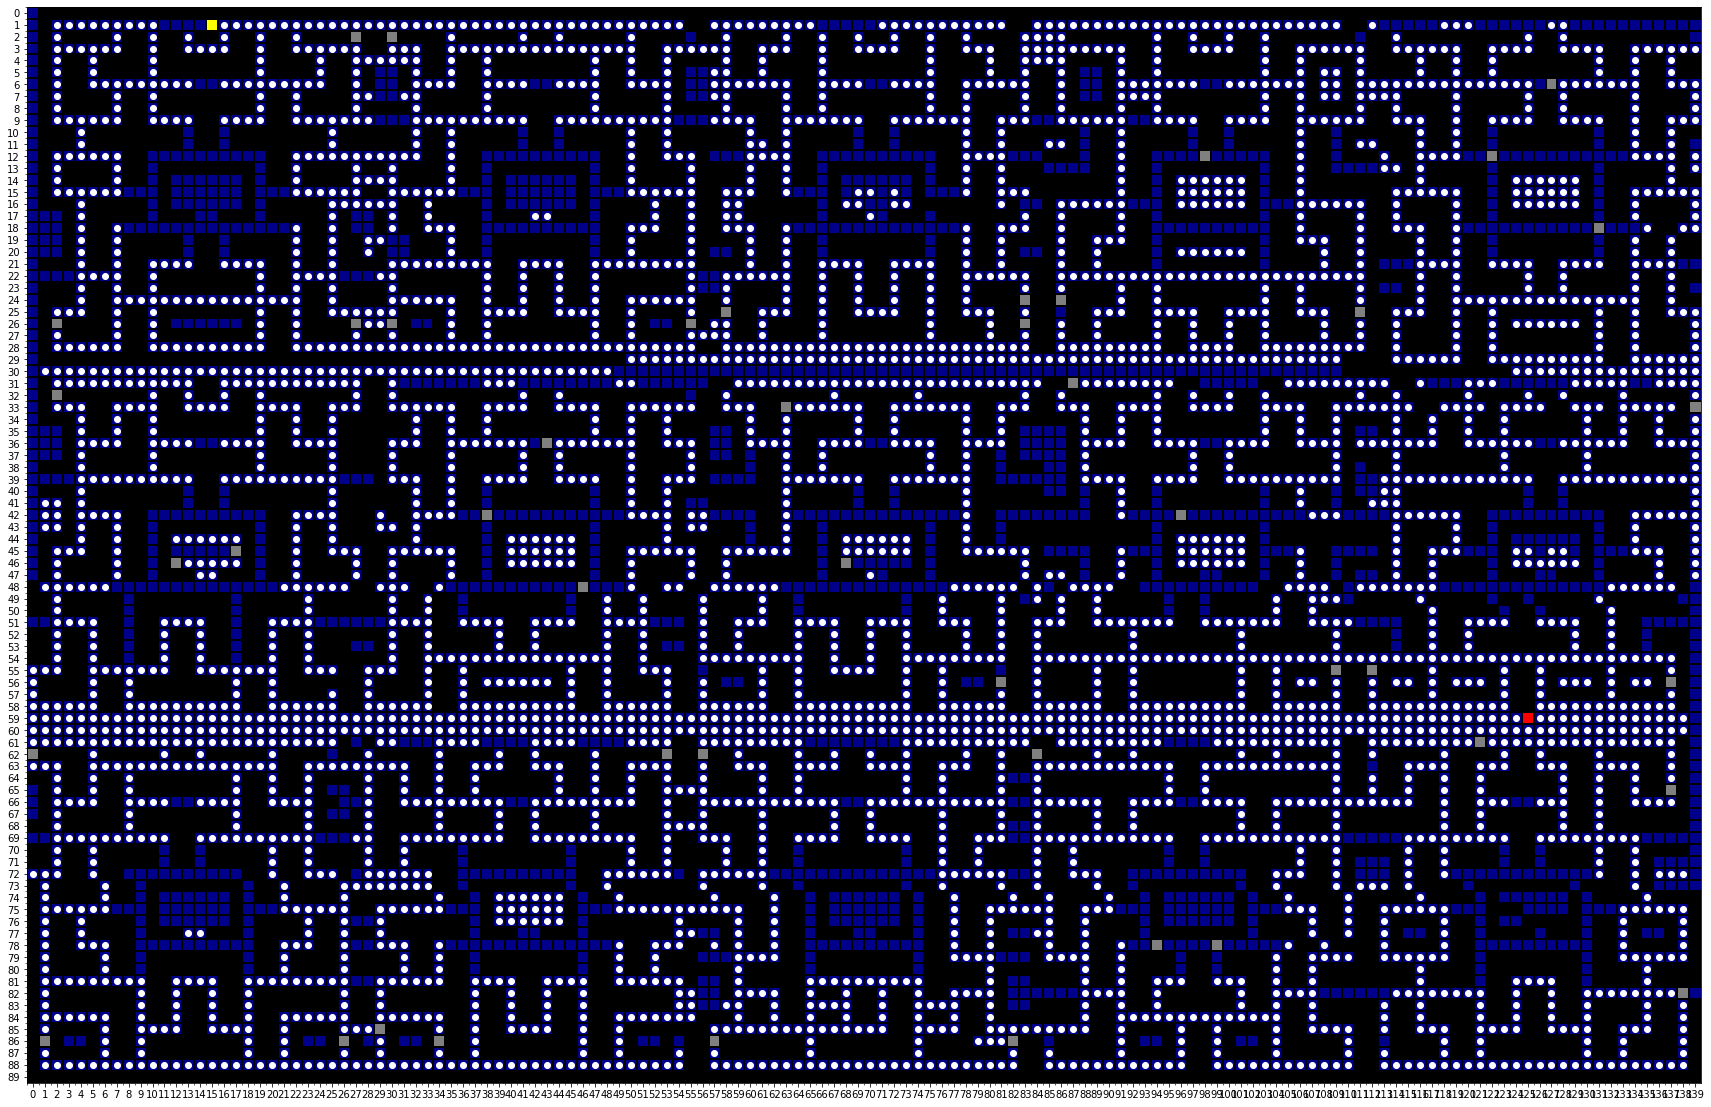

In [11]:
make_grid_plot(maze, initial_position, goal_position, mazeName_plot)

In [12]:
problem = pacman.PacmanProblem(maze, initial_position, goal_position)

# Breadth First Search - BFS

Tempo execução:  9.250379800796509
Maximum number of nodes in memory at same time:  68
Number of expanded nodes:
2451
Number of expanded food nodes:
1823
Number of nodes in the path:
93
Number of food nodes in the path:
47
------------------------------------------------
[<Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, 

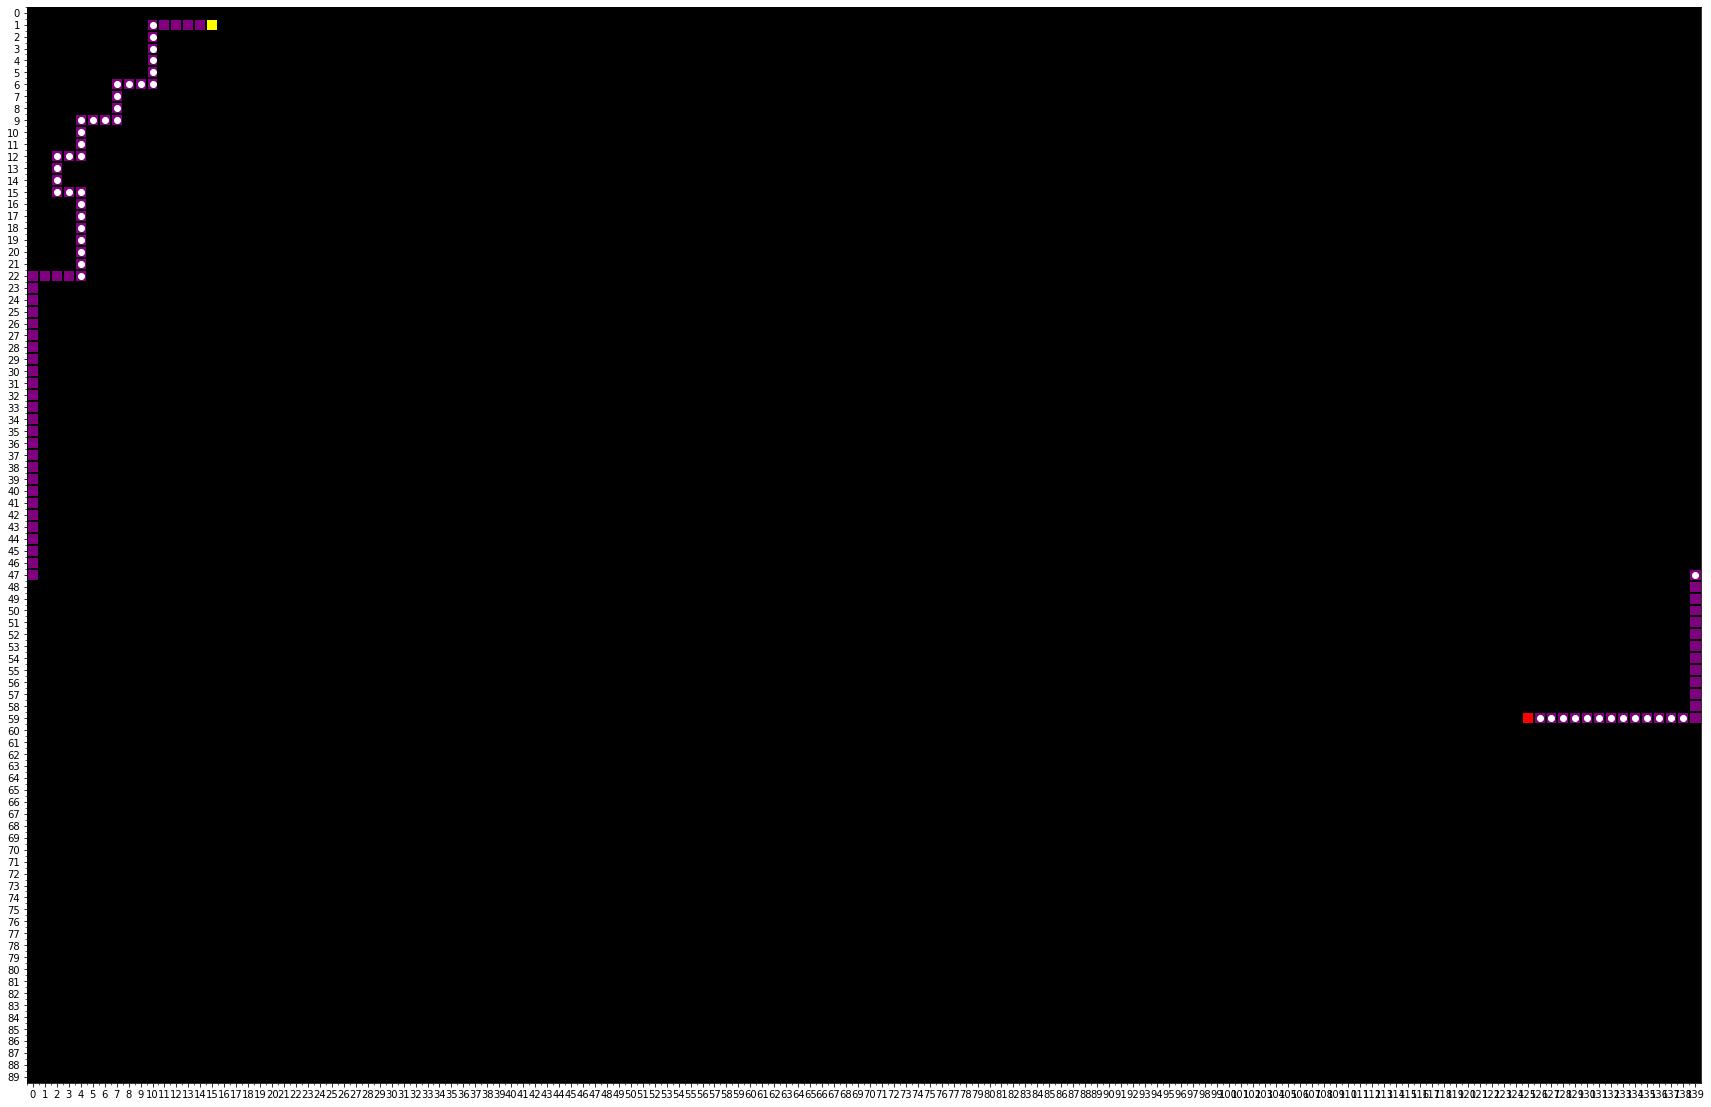

In [14]:
ini = time.time()
solution_node, expanded_nodes, food_nodes, tam = pacman.breadth_first_graph_search(problem)
fim = time.time()
print ("Tempo execução: ", fim-ini)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "BFS")

# Depth First Search - DFS

Tempo execução:  3.2824134826660156
Maximum number of nodes in memory at same time:  286
Number of expanded nodes:
853
Number of expanded food nodes:
681
Number of nodes in the path:
669
Number of food nodes in the path:
533
------------------------------------------------
[<Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT:

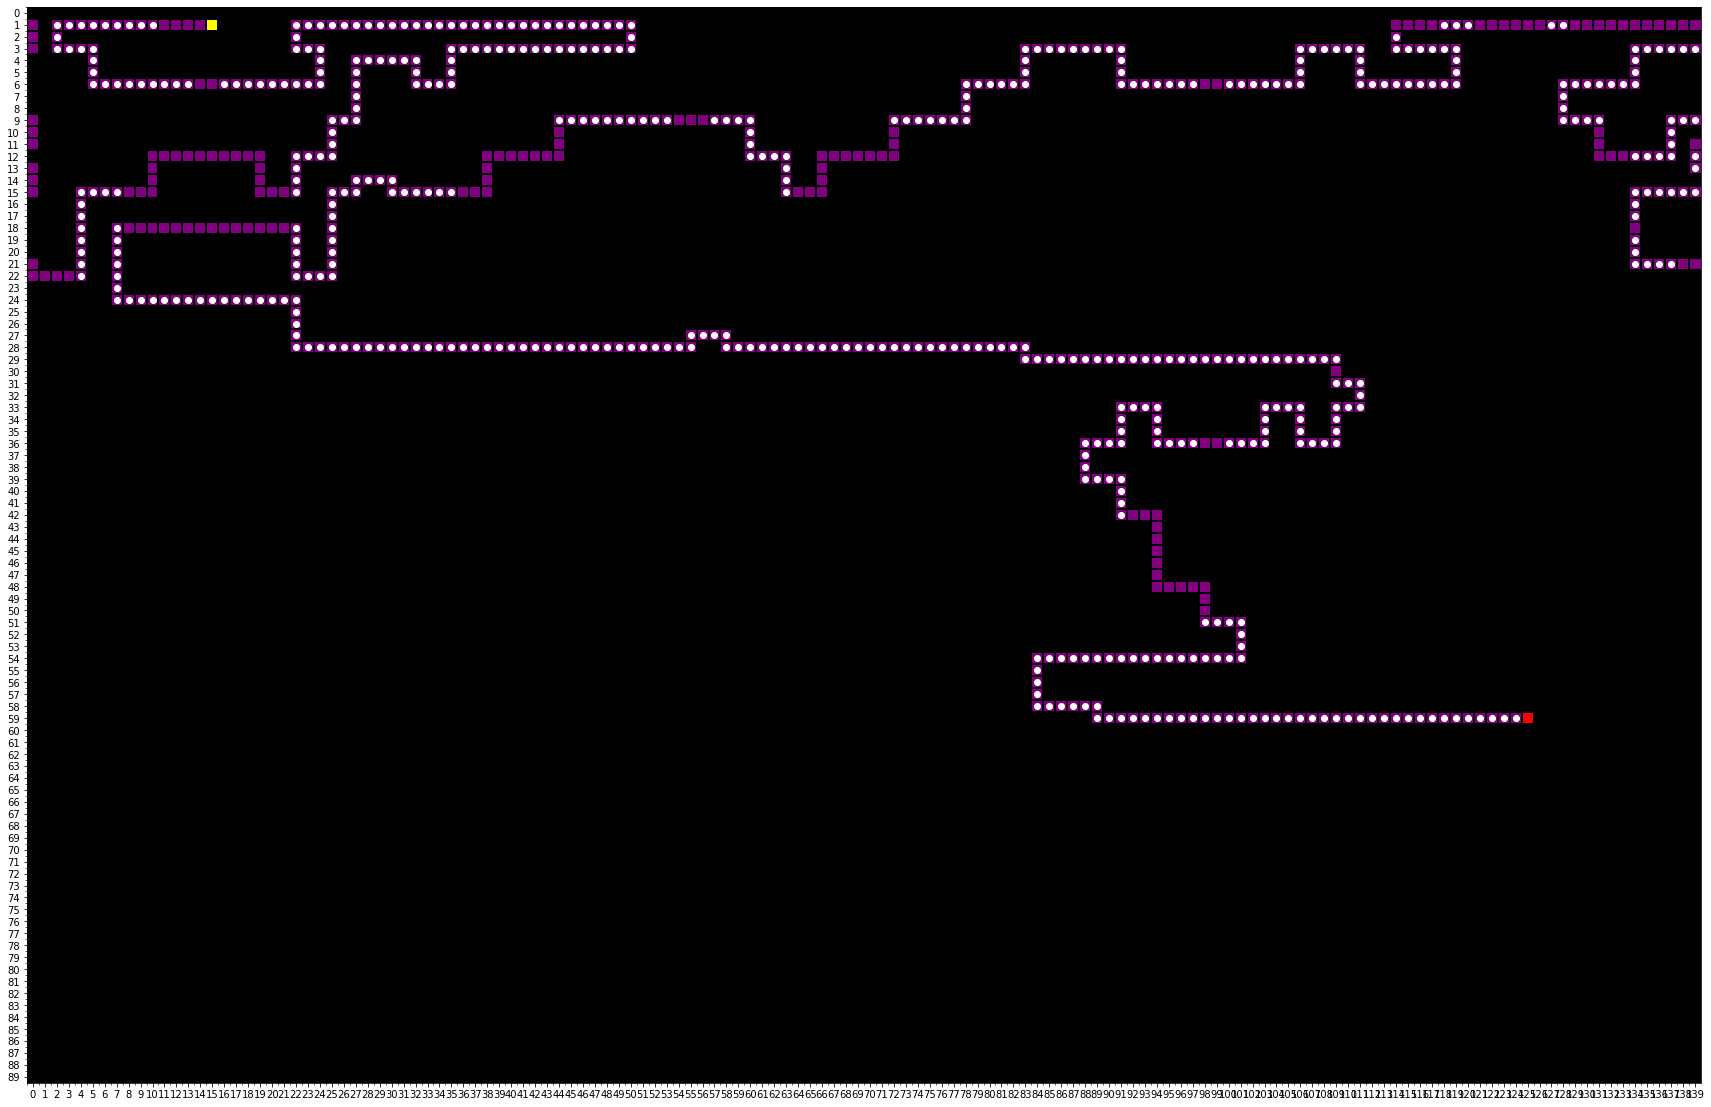

In [15]:
ini = time.time()
solution_node, expanded_nodes, food_nodes, tam = pacman.depth_first_graph_search(problem)
fim = time.time()
print ("Tempo execução: ", fim-ini)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "DFS")

# Greedy Search - Manhattan Distance

Tempo execução:  1.3377423286437988
Maximum number of nodes in memory at same time:  101
Number of expanded nodes:
342
Number of expanded food nodes:
253
Number of nodes in the path:
207
Number of food nodes in the path:
161
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, 

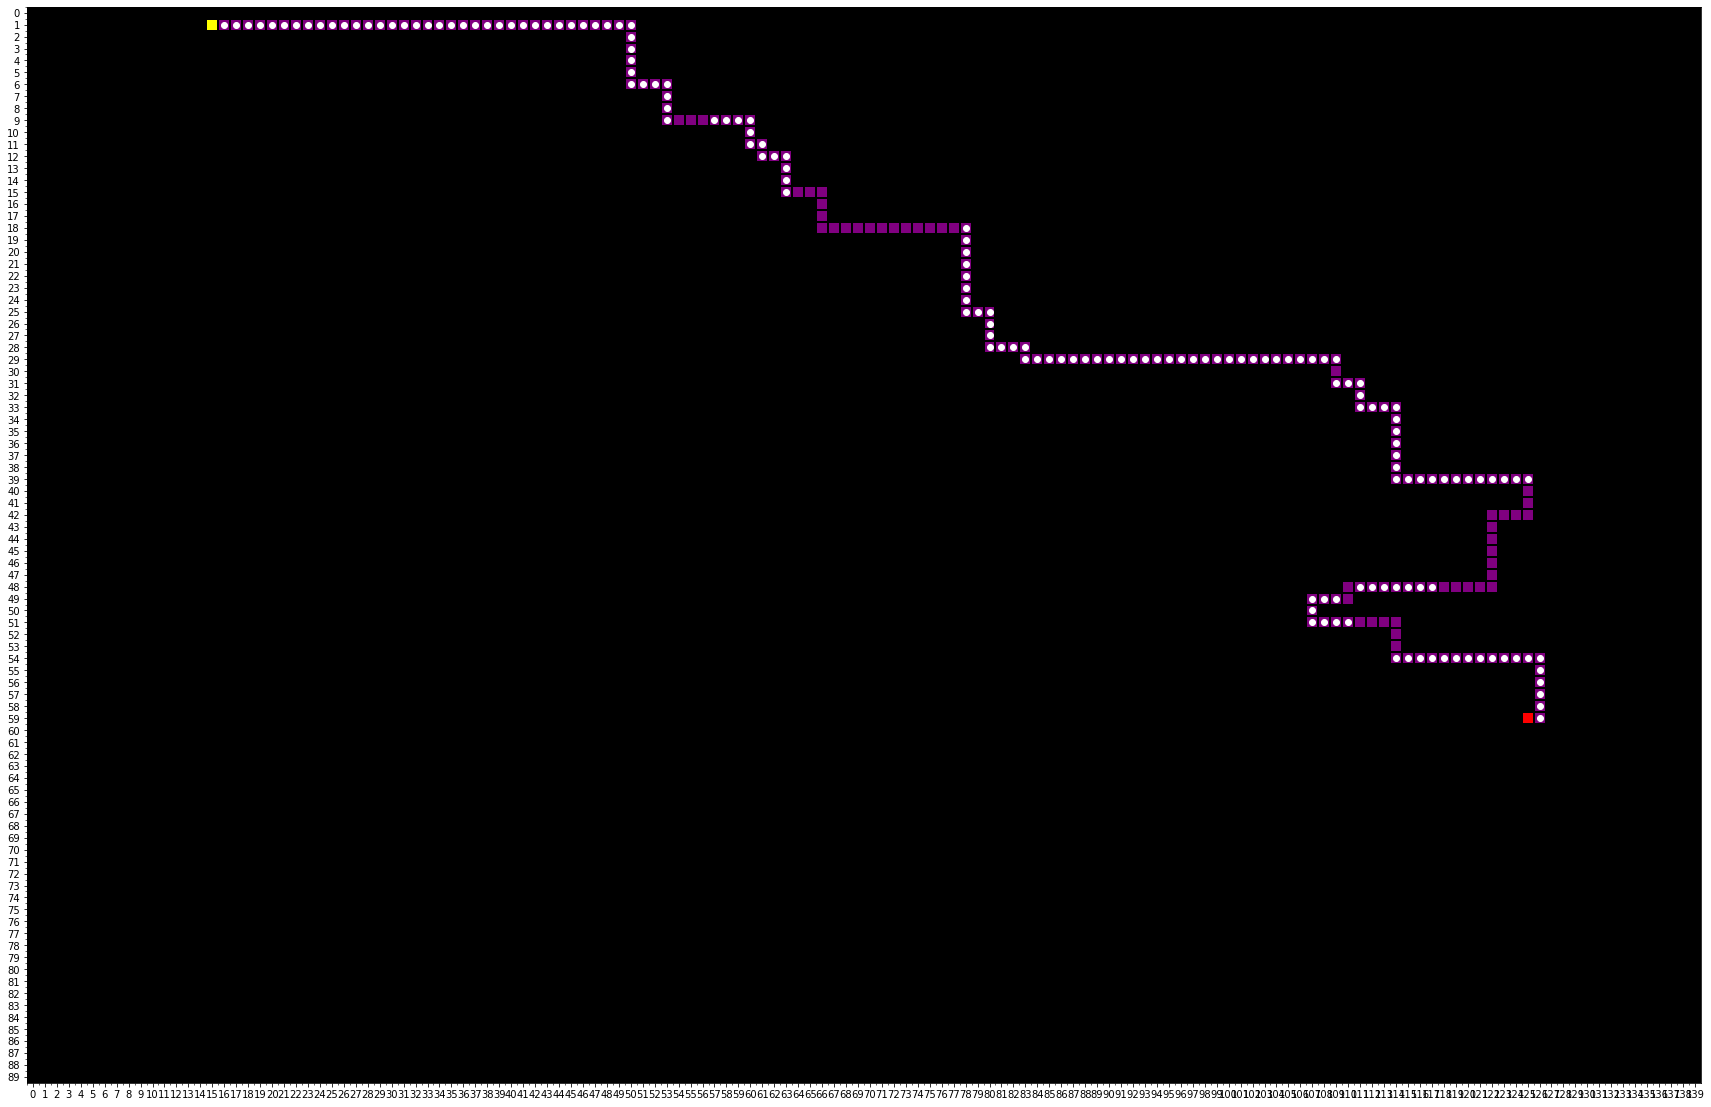

In [16]:
ini = time.time()
solution_node, expanded_nodes, food_nodes, tam = pacman.greedy_best_first_search(problem)
fim = time.time()
print ("Tempo execução: ", fim-ini)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "GS-MD")

# A* Search - Manhattan Distance

Tempo execução:  7.589659690856934
Maximum number of nodes in memory at same time:  262
Number of expanded nodes:
1898
Number of expanded food nodes:
1789
Number of nodes in the path:
195
Number of food nodes in the path:
193
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: 

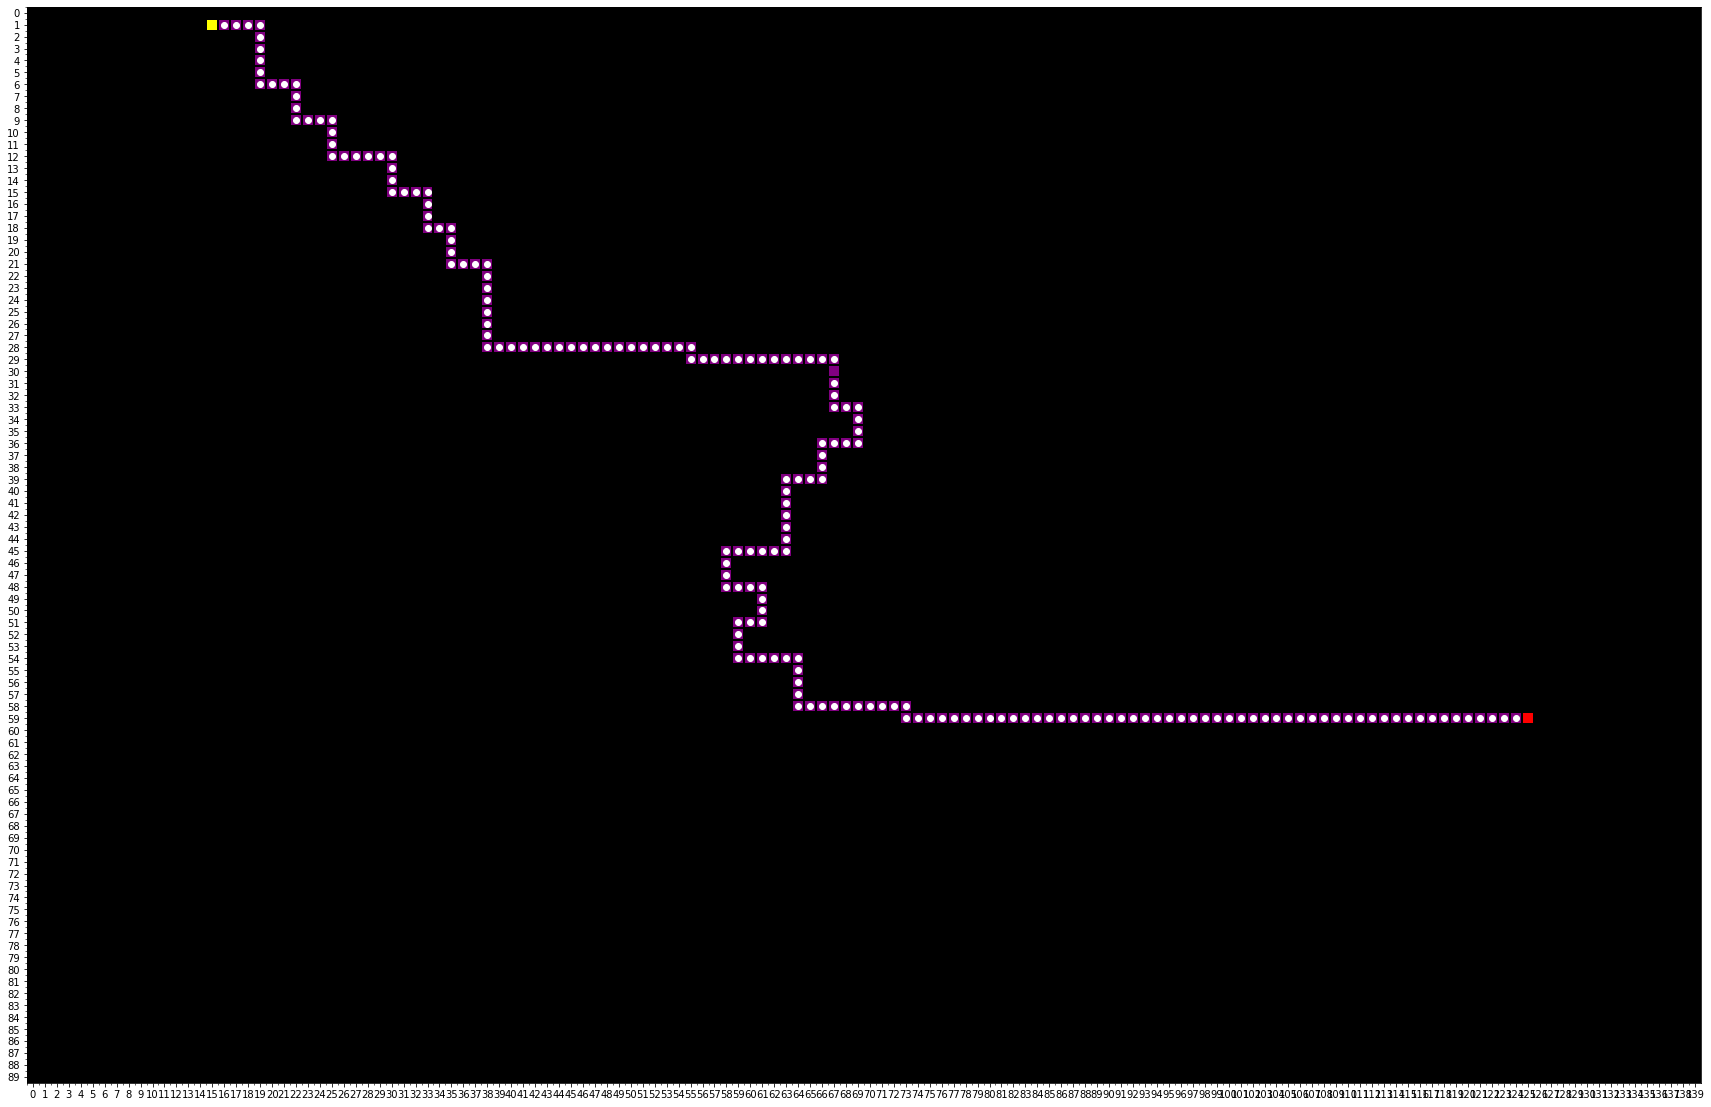

In [17]:
ini = time.time()
solution_node, expanded_nodes, food_nodes, tam = pacman.a_star_best_first_search(problem)
fim = time.time()
print ("Tempo execução: ", fim-ini)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "AS-MD")

# Greedy Search - Ghost Avoidance Heuristic with Euclidean Distance

In [18]:
problem_ghost = pacman.PacmanProblem(maze, initial_position, goal_position, ghost_proximity_cost=1000)

Tempo execução:  10.935551881790161
Maximum number of nodes in memory at same time:  183
Number of expanded nodes:
2690
Number of expanded food nodes:
2031
Number of nodes in the path:
455
Number of food nodes in the path:
312
------------------------------------------------
[<Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT:

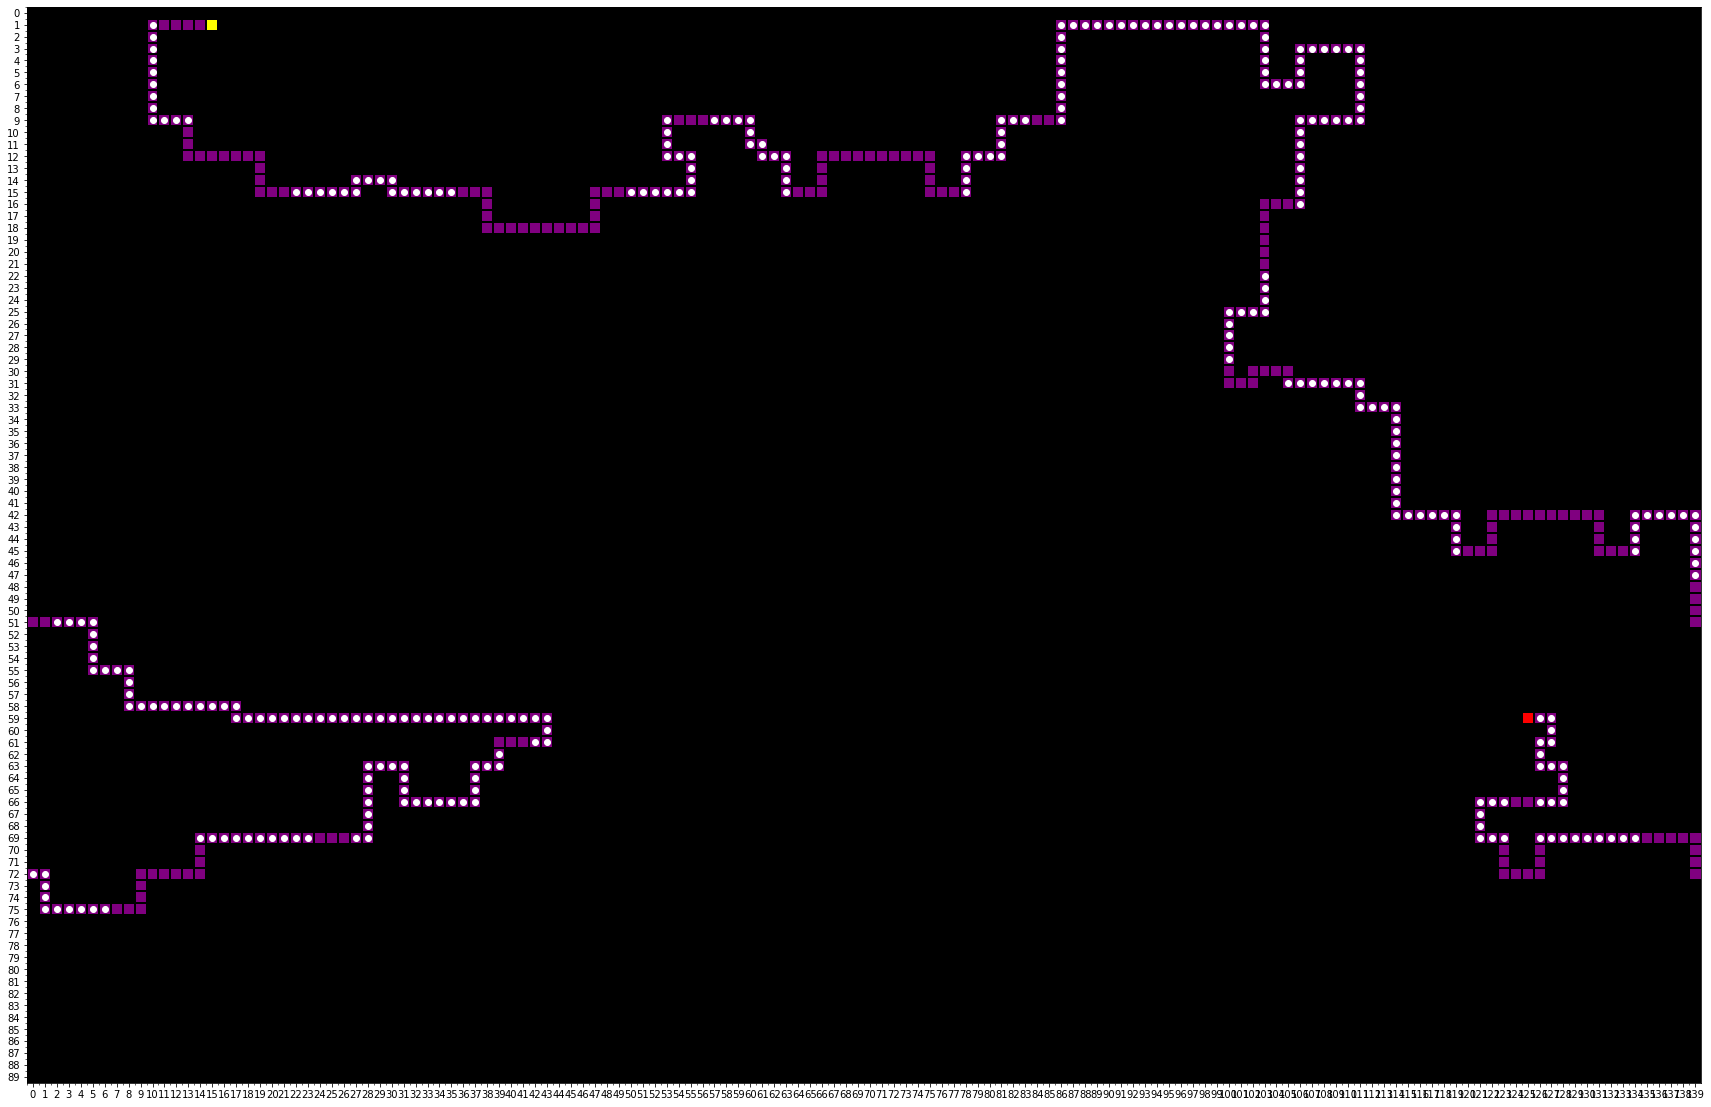

In [19]:
ini = time.time()
solution_node, expanded_nodes, food_nodes, tam = pacman.greedy_best_first_search(problem_ghost, problem_ghost.h_ghost_avoidance_euclidean)
fim = time.time()
print ("Tempo execução: ", fim-ini)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "GS-GAHED")

# A* Search - Ghost Avoidance Heuristic with Euclidean Distance

In [20]:
problem_ghost = pacman.PacmanProblem(maze, initial_position, goal_position, ghost_proximity_cost=1000)

Tempo execução:  13.86995244026184
Maximum number of nodes in memory at same time:  338
Number of expanded nodes:
3434
Number of expanded food nodes:
3276
Number of nodes in the path:
255
Number of food nodes in the path:
253
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: 

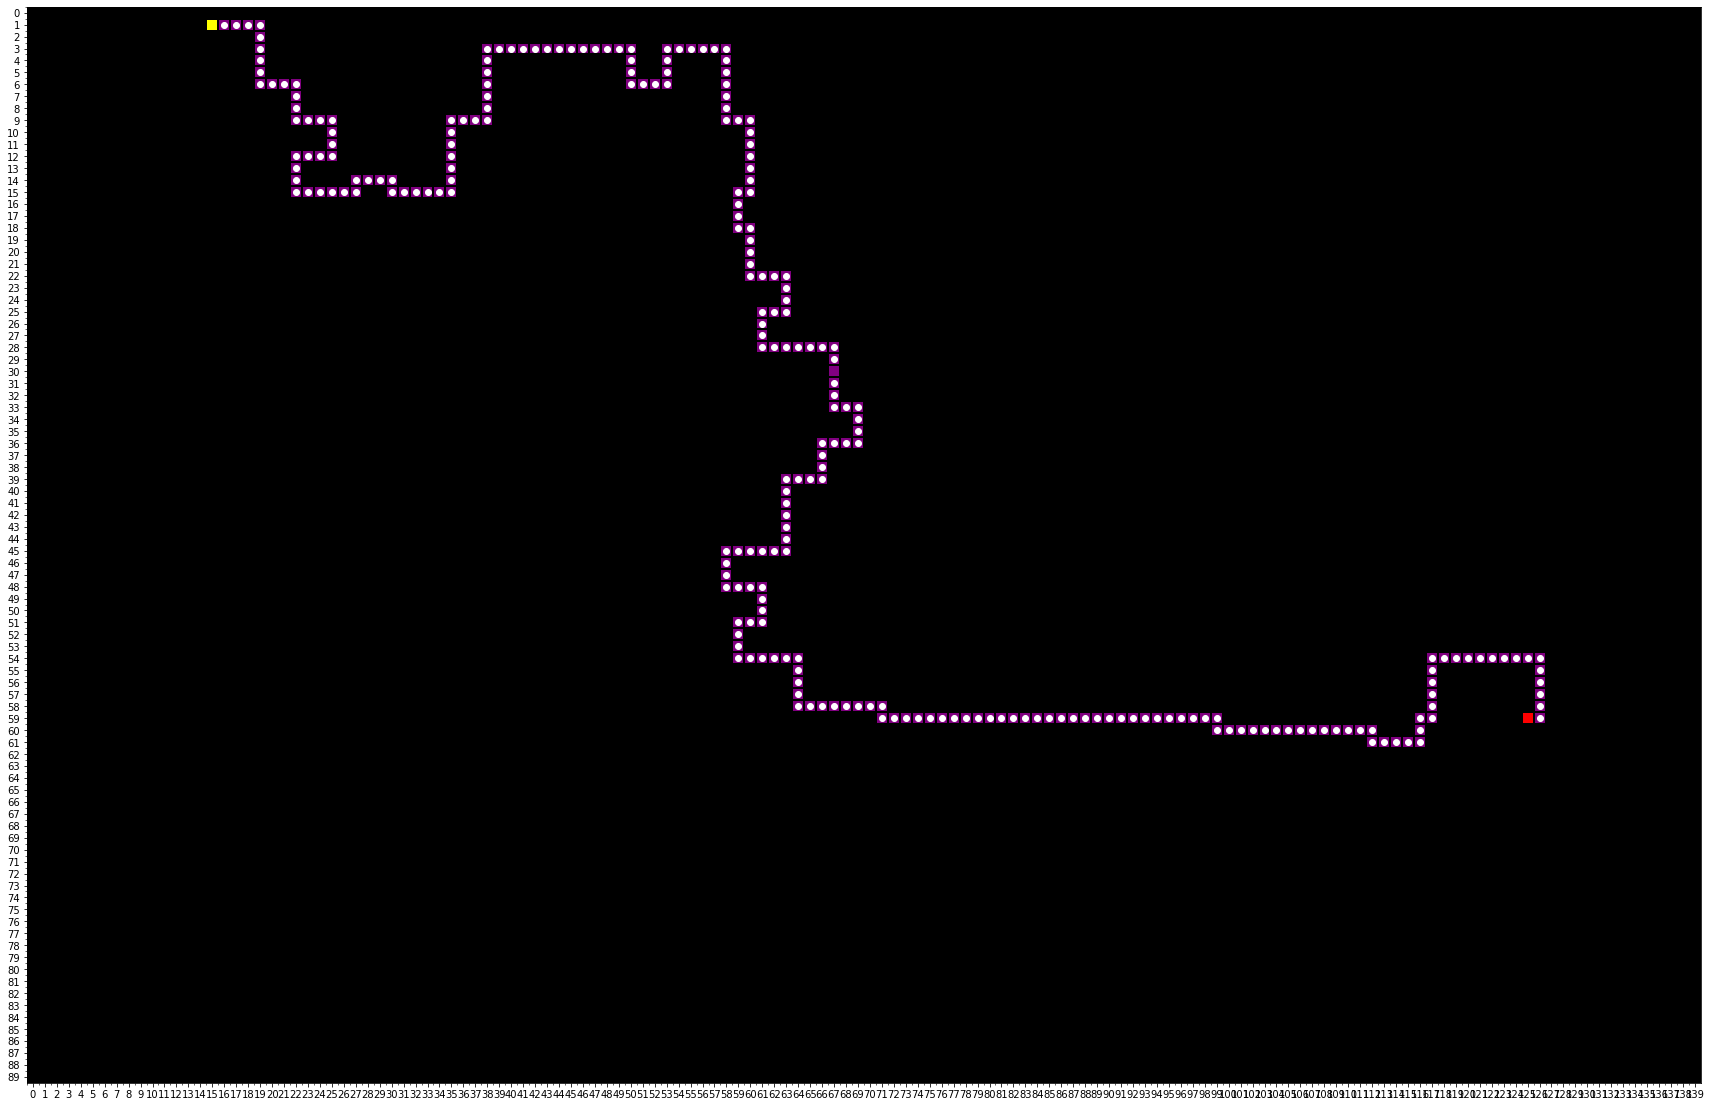

In [21]:
ini = time.time()
solution_node, expanded_nodes, food_nodes, tam = pacman.a_star_best_first_search(problem_ghost, problem_ghost.h_ghost_avoidance_euclidean)
fim = time.time()
print ("Tempo execução: ", fim-ini)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "AS-GAHED")

# A* Search - Shockwave Heuristic

In [28]:
maze, _, _ = enviroment.getMazeTest(maze_name, maze_arqs[maze_name][0], maze_arqs[maze_name][1], enviroment.ShockWaveMaze)
problem = pacman.PacmanProblem(maze, initial_position, goal_position)

### The lighter, the further from the goal

In [29]:
maze.set_shockwave(goal_position)

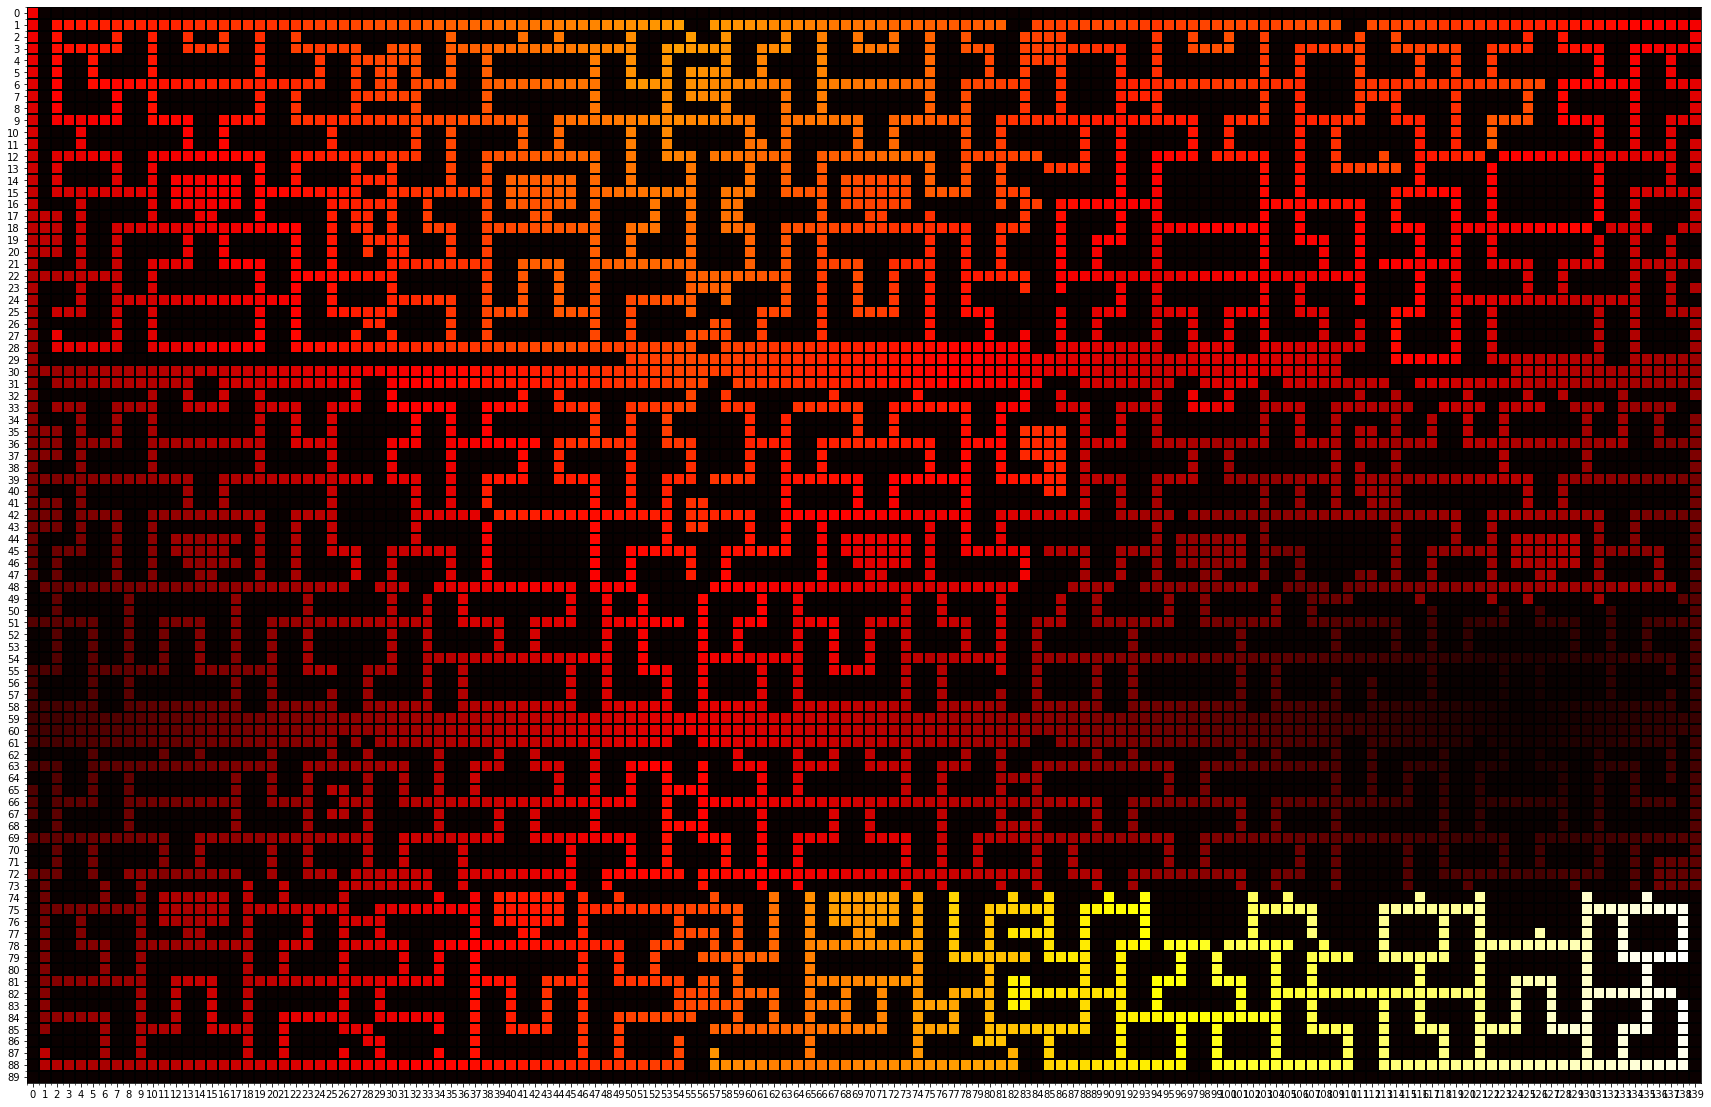

In [30]:
make_shockwave_grid_plot(maze, initial_position, goal_position, mazeName_plot)

Tempo execução:  7.454096555709839
Maximum number of nodes in memory at same time:  258
Number of expanded nodes:
1865
Number of expanded food nodes:
1749
Number of nodes in the path:
195
Number of food nodes in the path:
193
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: 

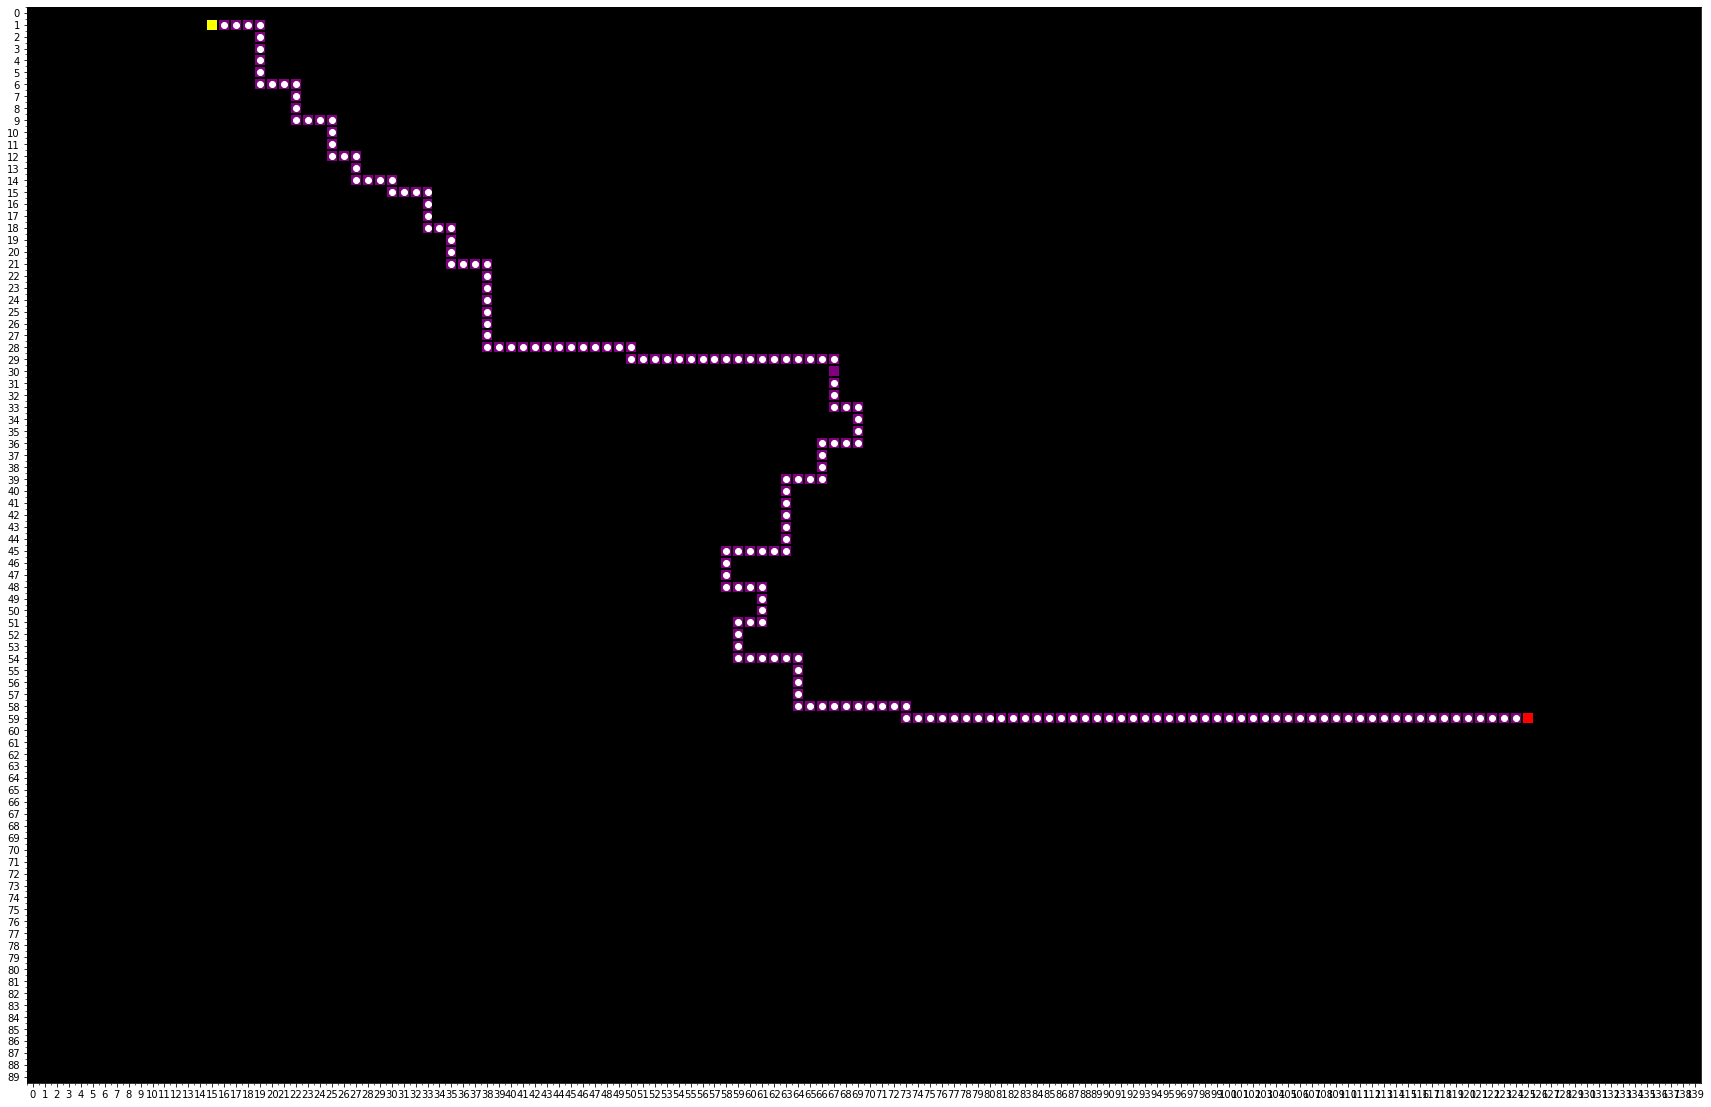

In [25]:
ini = time.time()
solution_node, expanded_nodes, food_nodes, tam = pacman.a_star_best_first_search(problem, problem.h_shockwave)
fim = time.time()
print ("Tempo execução: ", fim-ini)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "AS-SH")

# Greedy Search - Shockwave Heuristic

Tempo execução:  0.3936629295349121
Maximum number of nodes in memory at same time:  50
Number of expanded nodes:
92
Number of expanded food nodes:
61
Number of nodes in the path:
93
Number of food nodes in the path:
62
------------------------------------------------
[<Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Ac

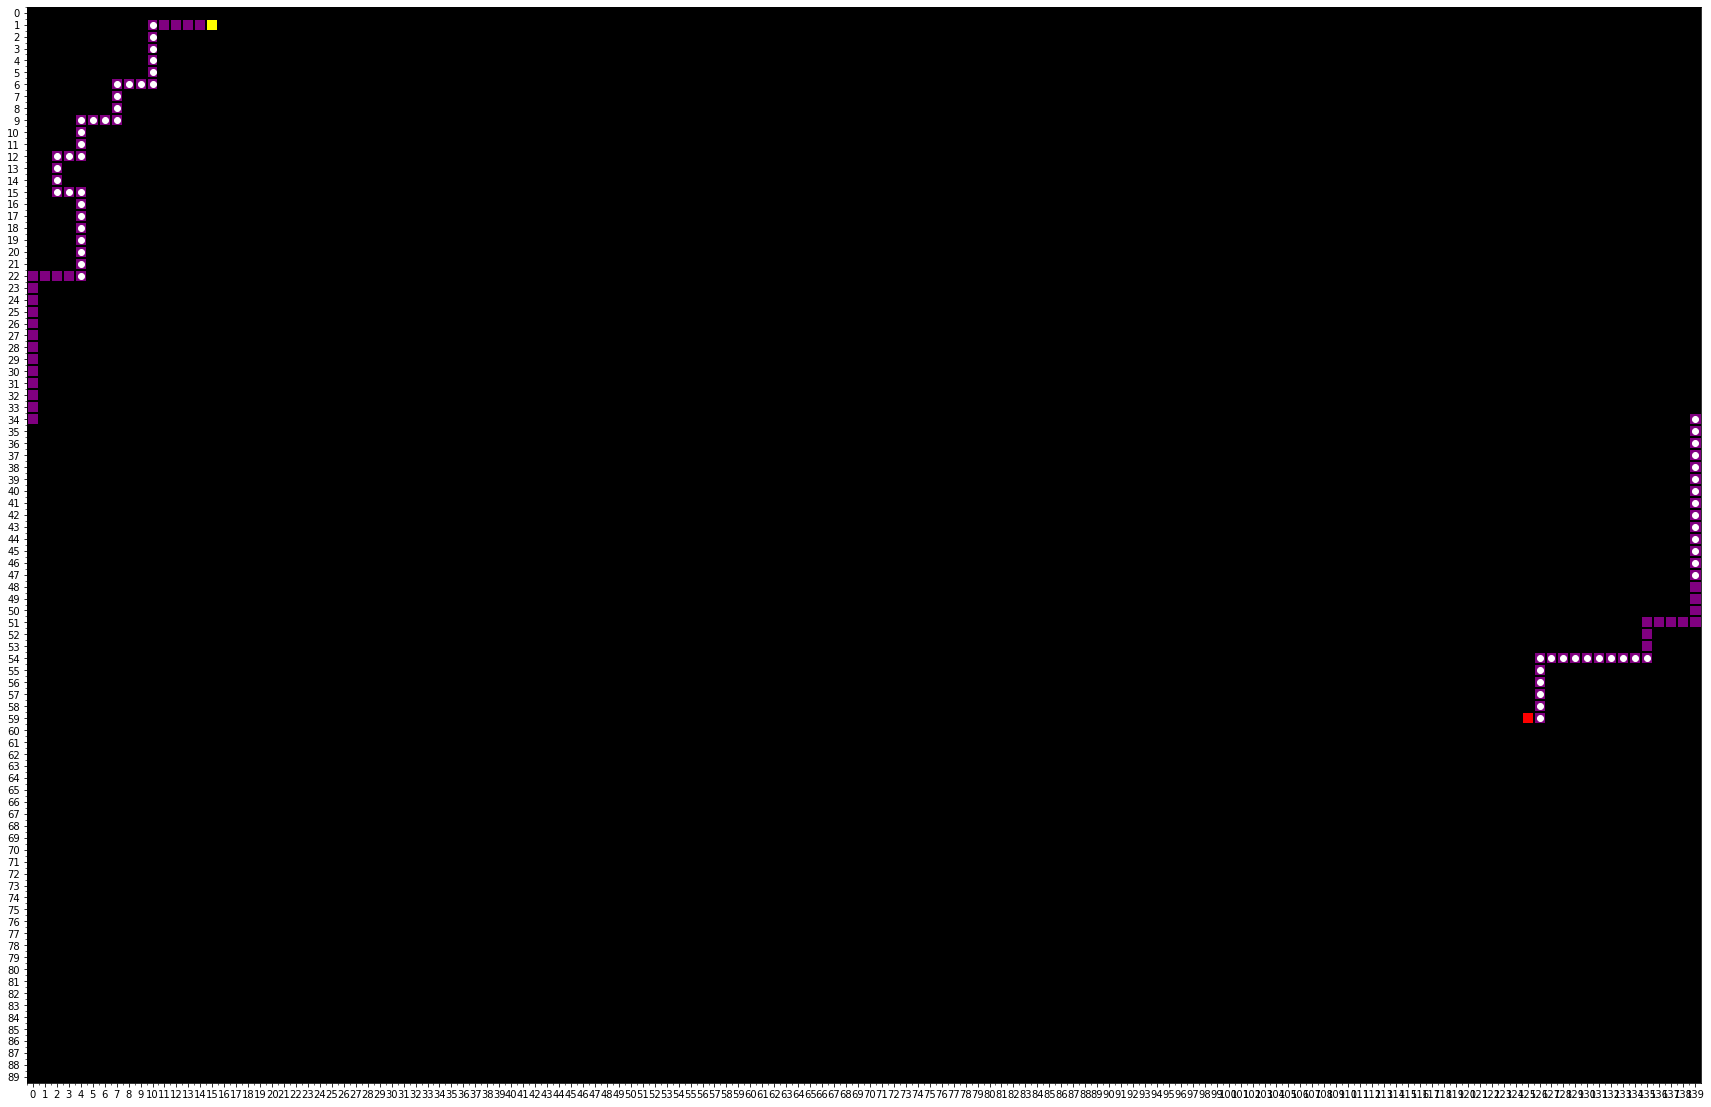

In [26]:
ini = time.time()
solution_node, expanded_nodes, food_nodes, tam = pacman.greedy_best_first_search(problem, problem.h_shockwave)
fim = time.time()
print ("Tempo execução: ", fim-ini)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "GS-SH")

# Hill-Climbing Local Search - Manhattan Distance

Tempo execução:  0.10135746002197266
Maximum number of nodes in memory at same time:  15
Number of expanded nodes:
15
Number of expanded food nodes:
14
Number of nodes in the path:
15
Number of food nodes in the path:
14
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>]
Path:
[<Node (1, 15)>, <Node (1, 16)>, <Node (1, 17)>, <Node (1, 18)>, <Node (1, 19)>, <Node (2, 19)>, <Node (3, 19)>, <Node (4, 19)>, <Node (5, 19)>, <Node (6, 19)>, <Node (6, 20)>, <Node (6, 21)>, <Node (6, 22)>, <Node (6, 23)>, <Node (6, 24)>]


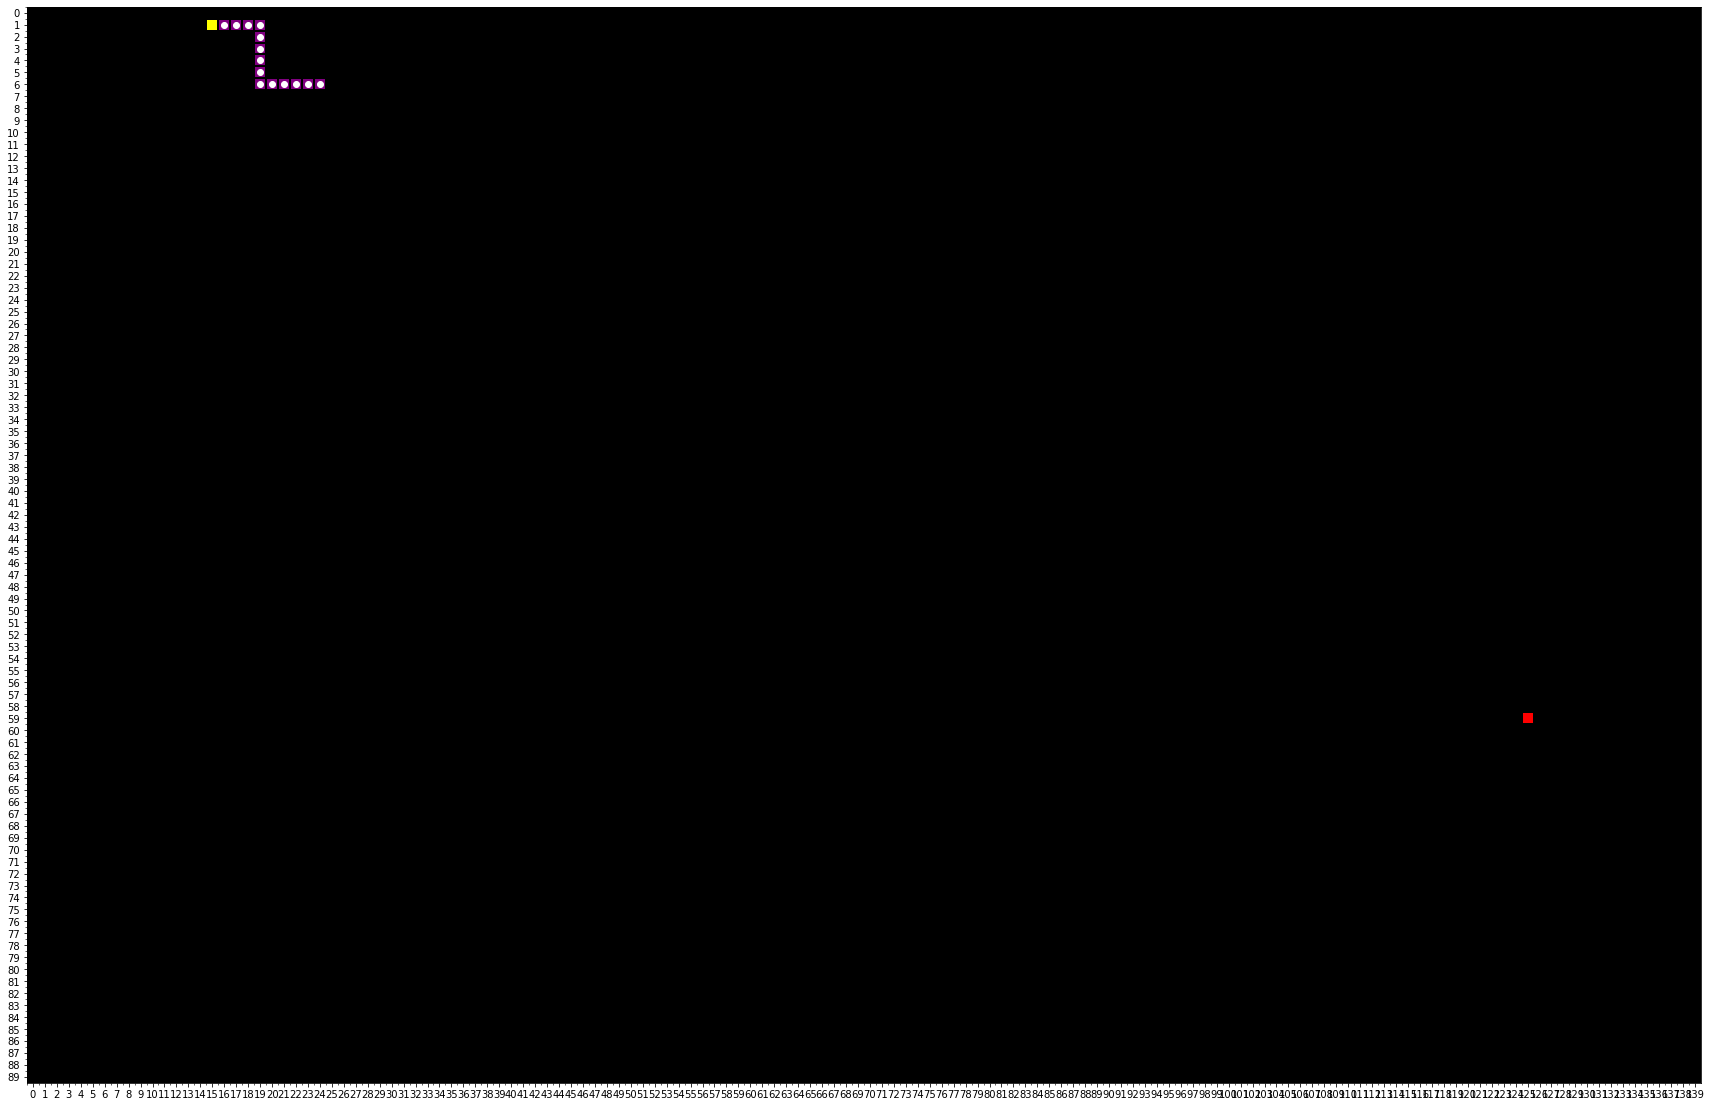

In [14]:
ini = time.time()
solution_node, expanded_nodes, food_nodes, tam = pacman.hill_climbing_search(problem, problem.h)
fim = time.time()
print ("Tempo execução: ", fim-ini)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "GS-SH")

# Hill-Climbing Local Search - Ghost Avoidance with Euclidean Distance

In [15]:
ini = time.time()
solution_node, expanded_nodes, food_nodes, tam = pacman.hill_climbing_search(problem, problem.h_ghost_avoidance_euclidean)
fim = time.time()
print ("Tempo execução: ", fim-ini)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "GS-SH")
# entra no range dos fantasmas, h sobe drasticamente

Tempo execução:  0.022673606872558594
Maximum number of nodes in memory at same time:  3
Number of expanded nodes:
3
Number of expanded food nodes:
2
Number of nodes in the path:
3
Number of food nodes in the path:
2
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>]
Path:
[<Node (1, 15)>, <Node (1, 16)>, <Node (1, 17)>]


# Hill-Climbing Local Search - Shockwave

Tempo execução:  0.45485973358154297
Maximum number of nodes in memory at same time:  93
Number of expanded nodes:
92
Number of expanded food nodes:
61
Number of nodes in the path:
93
Number of food nodes in the path:
62
------------------------------------------------
[<Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <A

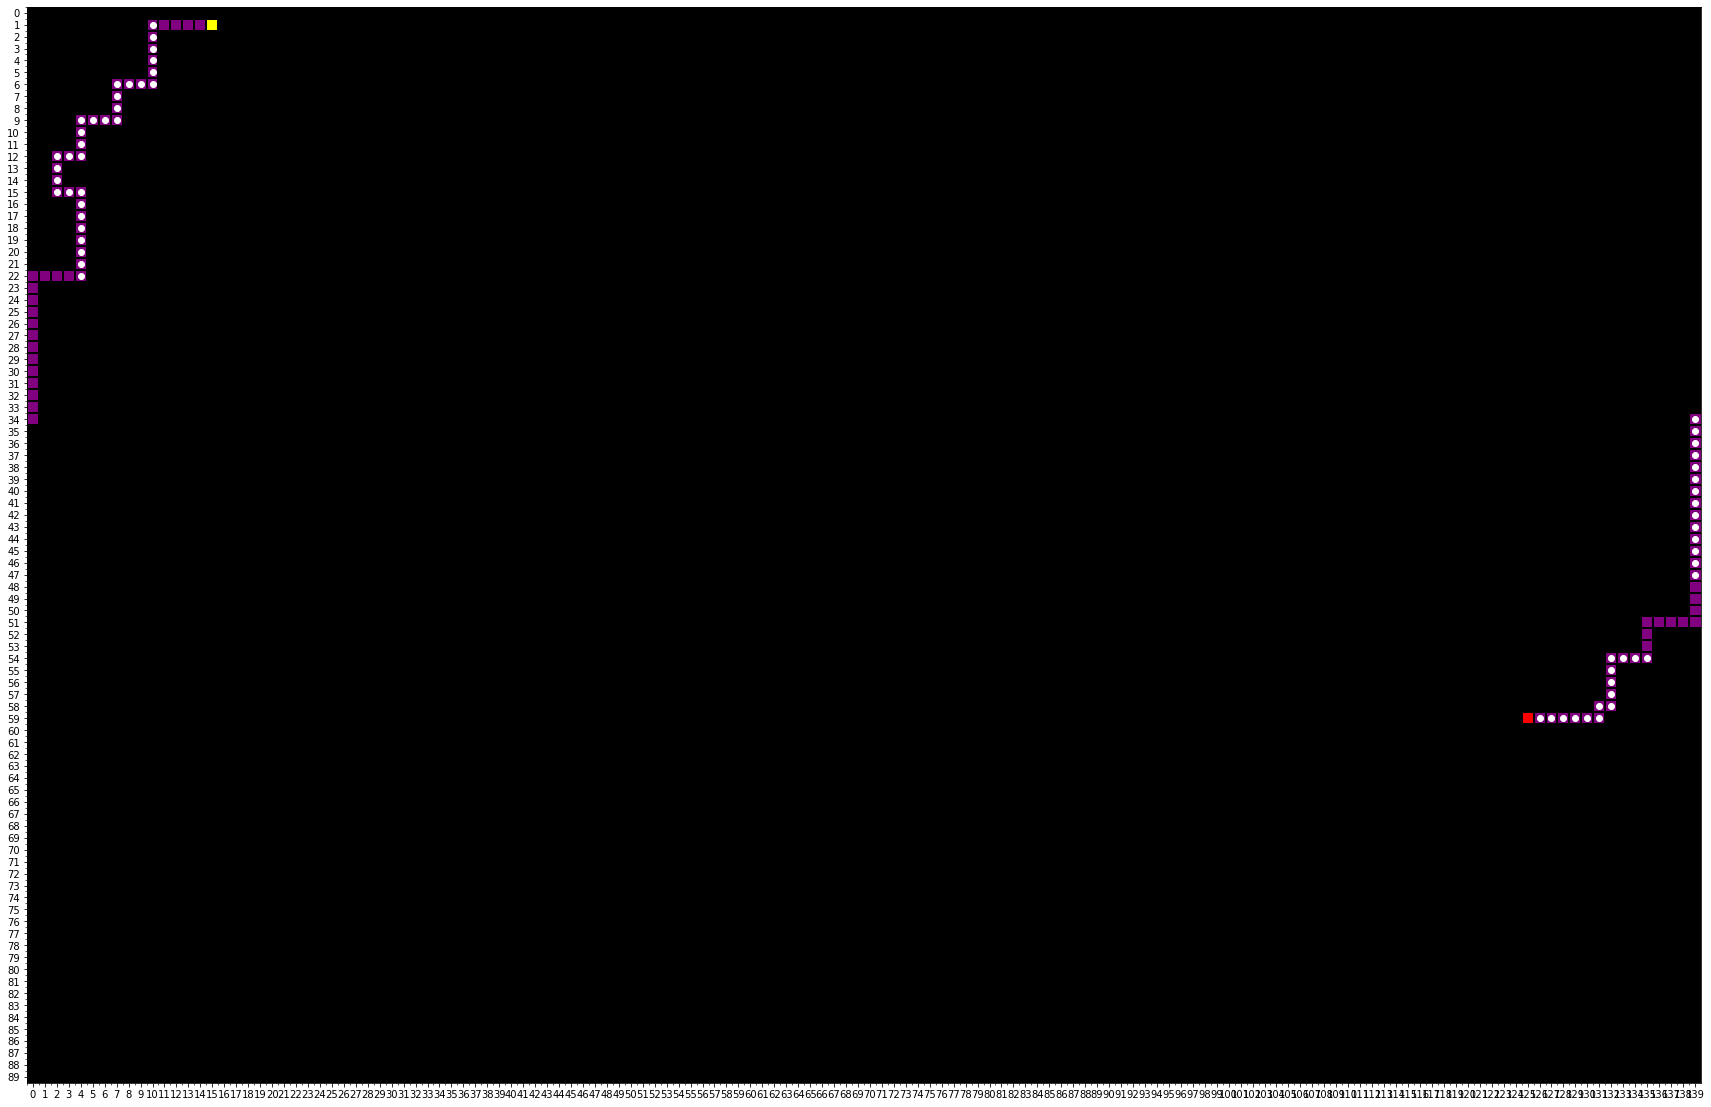

In [31]:
ini = time.time()
solution_node, expanded_nodes, food_nodes, tam = pacman.hill_climbing_search(problem, problem.h_shockwave)
fim = time.time()
print ("Tempo execução: ", fim-ini)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "AS-SH")